# Задание

+ Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.
+ Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.
+ Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.
+ Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
+ Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
+ Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.


# Решение

In [1155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

#### Грузим данные

In [1156]:
iris = load_iris()

In [1157]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [1158]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target 

In [1159]:
data['class'].unique()

array([0, 1, 2])

In [1160]:
#Рискну предположить, что искомые ирисы это 1 и 2 классы
data = data[ (data['class'] == 1) | (data['class'] == 2) ]

In [1161]:
data['class'] = data['class'] -1

In [1162]:
#после преобразования,если class 0 то versicolour, если 1 то virginica
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [1163]:
data.groupby('class').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
0,5.936,2.770,4.260,1.326
1,6.588,2.974,5.552,2.026


### Реализовываем логистическую регрессию самостоятельно

In [1164]:
#готовим параметры и таргет
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

In [1165]:
#бьем на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1166]:
#Сложим все в массивы
y_train_ = np.array(y_train)
y_test_ = np.array(y_test)
X_train_ = np.array(X_train)
X_test_ = np.array(X_test)

## Готовим функции, необходимые  для расчета: 
+ сигмоида для оценки вероятности, 
+ функция потерь (бинарная кросс-энтропия) 
+ сам градиент (уже с сигмоидой и функцией потерь)
+ функция прогноза

In [1167]:
#сигмоида

def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

In [1168]:
# Функция потерь (бинарная кросс-энтропия, аналог MAE)

def lost_function(X, y, W):

    h = sigmoid(X @ W)
    cost = (-y).T @ np.log(h) - (1-y).T @ np.log(1 - h)
    
    return cost

In [1169]:
# функция градиентного спуска

def gradient_descent(X, y, params, lrate, iterations):
    
    #делаем массив, куда будем записывать потери
    costs = np.zeros((iterations,1))

    #последовательно считаем потери, меняя начальные параметры на шаг обучения и заполняем массив
    for i in range(iterations):
        
        params = params - lrate * (X.T @ (sigmoid(X @ params) - y))
        costs[i] = lost_function(X, y, params)

    return (costs, params)

In [1170]:
#Прогноз класса

def predict(X, params):
    
    return np.round(sigmoid(X @ params))

#### Непосредственно обучение

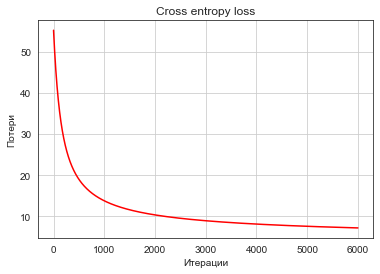

In [1177]:
n = np.size(X_train_,1)
params = np.zeros((n,1))

iterations = 6000
learning_rate = 0.001

initial_cost = lost_function(X_train_, y_train_, params)

(costs, best_params) = gradient_descent(X_train_, y_train_, params, learning_rate, iterations)

plt.figure()
plt.plot(range(len(costs)), costs, 'r')
plt.title("Cross entropy loss")
plt.xlabel("Итерации")
plt.ylabel("Потери")
plt.grid()
plt.show()

#### Посчитаем score модели - процент точных прогнозов класса

In [1178]:
y_pred = predict(X_test_, best_params)
score = float(sum(y_pred == y_test_) / len(y_pred))

print(score)

0.9


Score 0.9 говорит о том, что 90% классов спрогнозированы верно. В нашем случае - 18 из 20 в тестовой выборке

In [1179]:
y_pred_ = predict(X_train_, best_params)
score_ = float(sum(y_pred_ == y_train_) / len(y_pred_))

print(score_)

0.975


В тренировочной выборке верно спрогнозировано 97.5% классов

#### Посчитаем точность прогноза руками. Если число меньше 0, то класс 0, если больше, то класс 1

In [1180]:
X_test['class'] = y_test['class']

/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1181]:
params_ = []

for j in range(4):
    
    params_.append(best_params[j][0])
    
#Сделаем пустую таблицу для результатов 

check_table = pd.DataFrame()

# Пройдем по всему датасету и посчитаем класс для каждого цветка, а потом сравним с фактическим классом

pred_ = []
class_ = []
accuracy = []
values_list = []

for a in range(len(X_test)):
    
    value_ = 0
    
    for g in range (4):
        
        value_ += X_test.iloc[a:a+1,:].values[0][g] * params_[g]
        
    values_list.append(value_)
        
    pred_.append(int(value_ >= 0))
    class_.append(X_test.iloc[a:a+1,:].values[0][4])
    accuracy.append(int(value_ >= 0) - X_test.iloc[a:a+1,:].values[0][4])
    
check_table['class_'] = class_
check_table['pred'] = pred_
check_table['accuracy'] = accuracy
check_table['value_'] = values_list

check_table['accuracy'].value_counts()

0.0    18
1.0     2
Name: accuracy, dtype: int64

In [1182]:
check_table[check_table['accuracy'] != 0]

,class_,pred,accuracy,value_
3,0.0,1,1.0,2.937955
19,0.0,1,1.0,0.913862


18 из 20 спрогнозированы верно :)

Помним о том, что модель возвращает лишь вероятность отнесения к тому или иному классу и может немного ошибаться